In [3]:
import numpy as np # для работы с числами, массивами
import matplotlib.pyplot as plt # основная библиотека для графиков
from pandas import Series, DataFrame # базовая библиотека для работы с данными
# from pandas.tools.plotting import scatter_matrix
import pandas as pd
%matplotlib inline

In [5]:
all_data_table = pd.read_table('data/langs_all_info_merged.tsv', index_col=0)

# True - False, где нет данных про интернет
no_inet_data = all_data_table['all_domains'] >= 0 

numeric_data_inet = all_data_table[no_inet_data]

Медианное значение количества слов на страницу -- важный параметр. На наш взгляд, это один из показателей того, насколько язык себя <<уверенно чувствует>> в интернете. Видно, что у этого значения достаточно большой разброс - маленькое минимальное, на 4 порядка больше его максимальное и довольно большое стандартное отклонение.

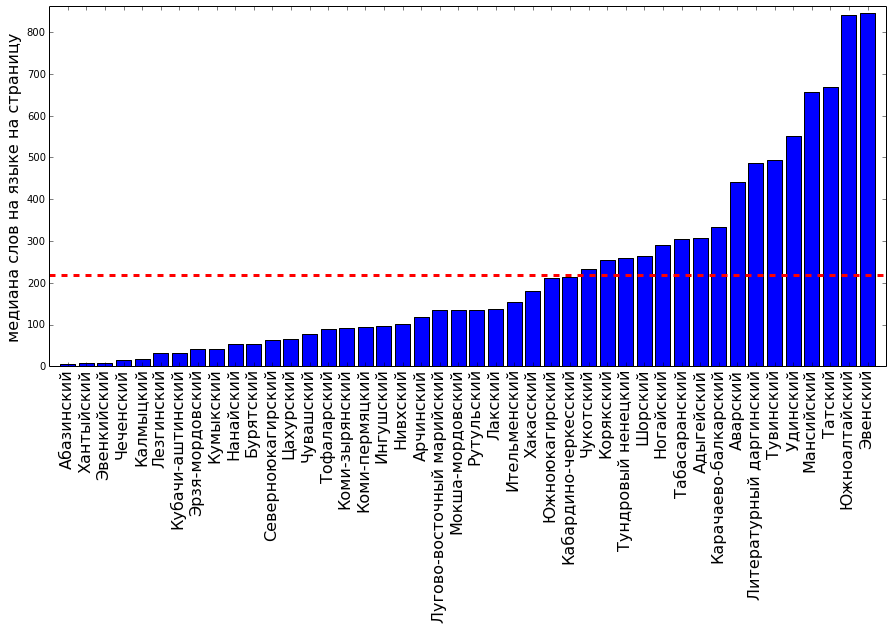

In [59]:
sorted_by_token_median = numeric_data_inet.sort_values(by='token_median')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

x = np.array([i for i in range(len(sorted_by_token_median.index))])
y = sorted_by_token_median['token_median']

plt.bar(x, y, align="center")

plt.ylabel("медиана слов на языке на страницу", fontsize=16)

max_x = len(sorted_by_token_median.index)
max_y = max(sorted_by_token_median['token_median']) + 15
plt.axis([-1, max_x, 0, max_y])

ax.set_xticks(range(len(sorted_by_token_median.index)))
ax.set_xticklabels(sorted_by_token_median.index, rotation=90, fontsize=16)

plt.axhline(numeric_data_inet['token_median'].mean(), color='r', linestyle='--', linewidth=3)

plt.subplots_adjust(bottom=0.40)
# plt.show()

plt.savefig('token_median.png', dpi=100)

На графике выше языки упорядочены по медианному значению слов на малом языке на веб-страницу (подпись - медиана слов на языке на страницу), красной пунктирной линией обозначено среднее значение. Как видно из графика, медиана слов не совсем соответствует нашим ожиданиям - почти все самые большие по количеству токенов и страниц языки находятся ниже среднего значения. Это может быть объяснено методикой создания текстовой коллекции. Дело в том, что порог количества страниц, после которого мы выкачивали сайт целиком был статическим, ввиду сложности технической реализации мы никак не учитывали общее количество страниц сайта. Конечно, при подсчёте скачанного количества веб-страниц на малом языке мы учитывали только те страницы, на которых есть хотя бы один абзац на малом языке, но зачастую эти тексты могли быть просто краткими заголовками новости на соседней странице. Так, например, на бурятском сайте "Россия Бурятия" мы нашли с помощью поискового движка Яндекса 86 страниц на бурятском. Вот эта конкретная страница http://bgtrk.ru/tv/archive/syuzhety/85633/ была определена нами как имеющая бурятские слова, что правда так, ведь в правой колонке представлены названия программ бурятского телевидения по-бурятски. Можно предположить, что конкретно на этом сайте таких страниц много, а ведь всего с сайта было выкачано больше сорока тысяч страниц.

Отметим также, что наш метод определения текста работает не со 100% точностью, поэтому часть текста могла быть отнесена к малому языку ошибочно и таким образом учитывались страницы и токены, которые при более тщательном (скорее ручном) составлении коллекции могли бы быть вычеркнуты.

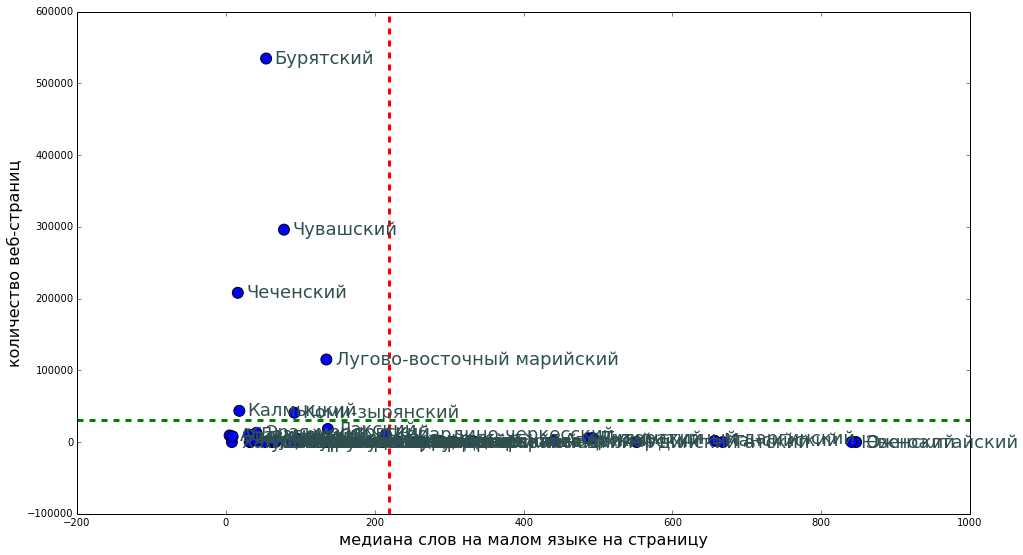

In [51]:
# plt.scatter(x,y)

fig, ax = plt.subplots(figsize=(16.0, 9.0))
# numeric_data_inet.plot.scatter(x='token_median', y='urls', figsize=(12, 6))
numeric_data_inet.plot.scatter('token_median', 'urls', ax=ax, s=120) #, linewidth=0, c=range(len(numeric_data_inet)))

plt.ylabel("количество веб-страниц", fontsize=16)
plt.xlabel("медиана слов на малом языке на страницу", fontsize=16)

plt.axvline(numeric_data_inet['token_median'].mean(), color='r', linestyle='--', linewidth=3)
plt.axhline(numeric_data_inet['urls'].mean(), color='g', linestyle='--', linewidth=3)

for k, v in numeric_data_inet.ix[:, ['token_median', 'urls']].iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')
plt.savefig('token_median_urls_full.png', dpi=100)

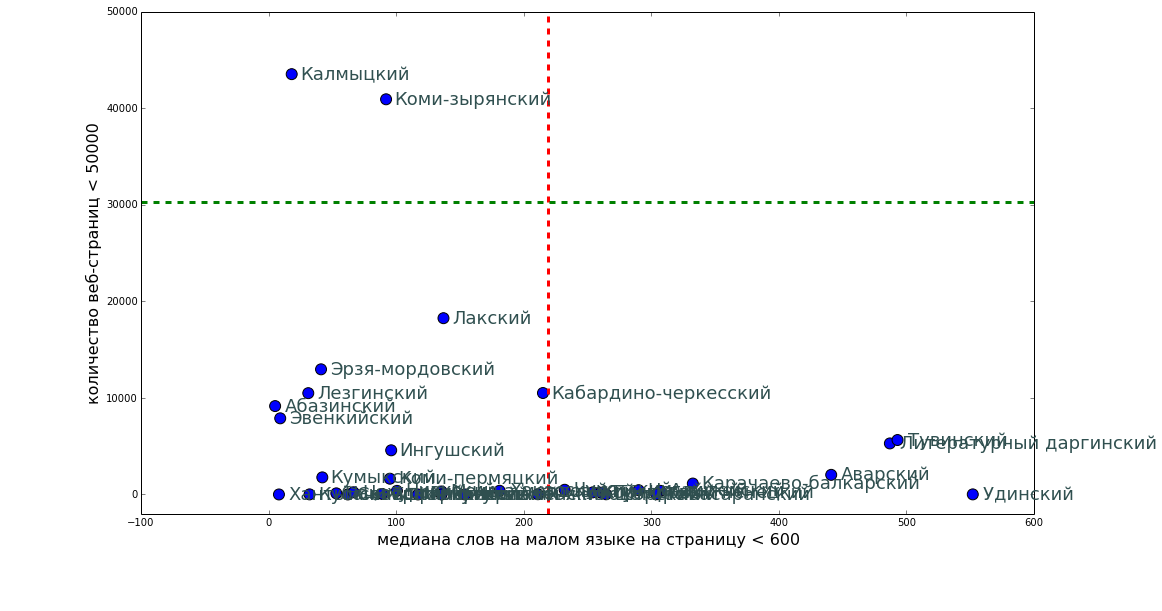

In [52]:
fig, ax = plt.subplots(figsize=(16.0, 9.0))
# numeric_data_inet.plot.scatter(x='token_median', y='urls', figsize=(12, 6))
numeric_data_inet.plot.scatter('token_median', 'urls', ax=ax, s=120) #, linewidth=0, c=range(len(numeric_data_inet)))

plt.ylabel("количество веб-страниц < 50000", fontsize=16)
plt.xlabel("медиана слов на малом языке на страницу < 600", fontsize=16)

plt.ylim([-2000, 50000])
plt.xlim([-100, 600])

plt.axvline(numeric_data_inet['token_median'].mean(), color='r', linestyle='--', linewidth=3)
plt.axhline(numeric_data_inet['urls'].mean(), color='g', linestyle='--', linewidth=3)

for k, v in numeric_data_inet.ix[:, ['token_median', 'urls']].iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')
    
plt.savefig('token_median_600_urls_50000.png', dpi=100)

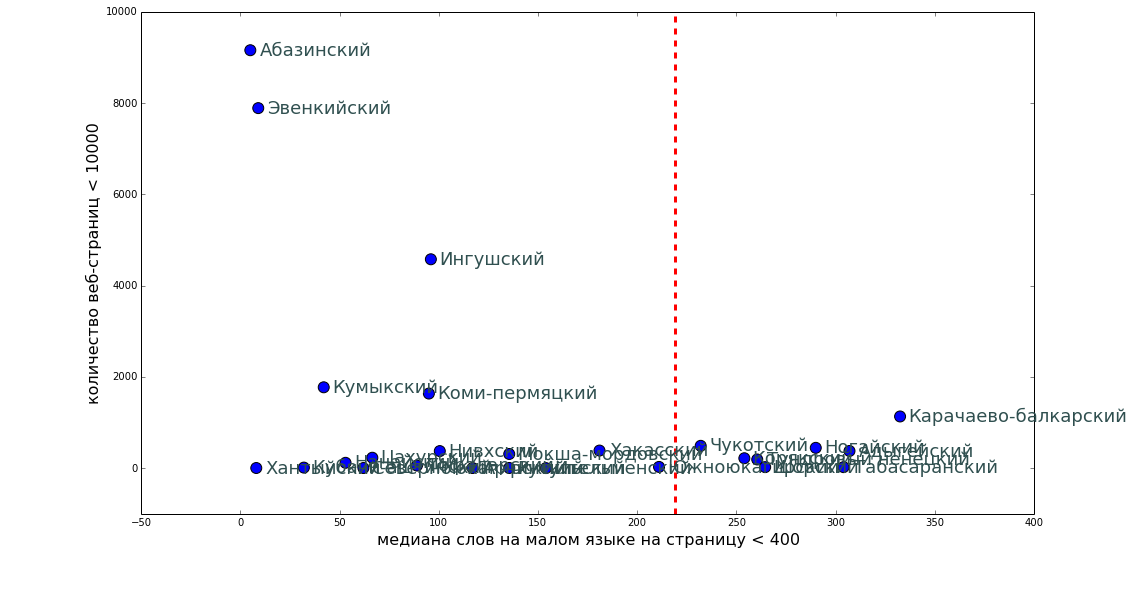

In [53]:
fig, ax = plt.subplots(figsize=(16.0, 9.0))
# numeric_data_inet.plot.scatter(x='token_median', y='urls', figsize=(12, 6))
numeric_data_inet.plot.scatter('token_median', 'urls', ax=ax, s=120) #, linewidth=0, c=range(len(numeric_data_inet)))

plt.ylabel("количество веб-страниц < 10000", fontsize=16)
plt.xlabel("медиана слов на малом языке на страницу < 400", fontsize=16)

plt.ylim([-1000, 10000])
plt.xlim([-50, 400])

plt.axvline(numeric_data_inet['token_median'].mean(), color='r', linestyle='--', linewidth=3)
plt.axhline(numeric_data_inet['urls'].mean(), color='g', linestyle='--', linewidth=3)

for k, v in numeric_data_inet.ix[:, ['token_median', 'urls']].iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')

plt.savefig('token_median_400_urls_10000.png', dpi=100)

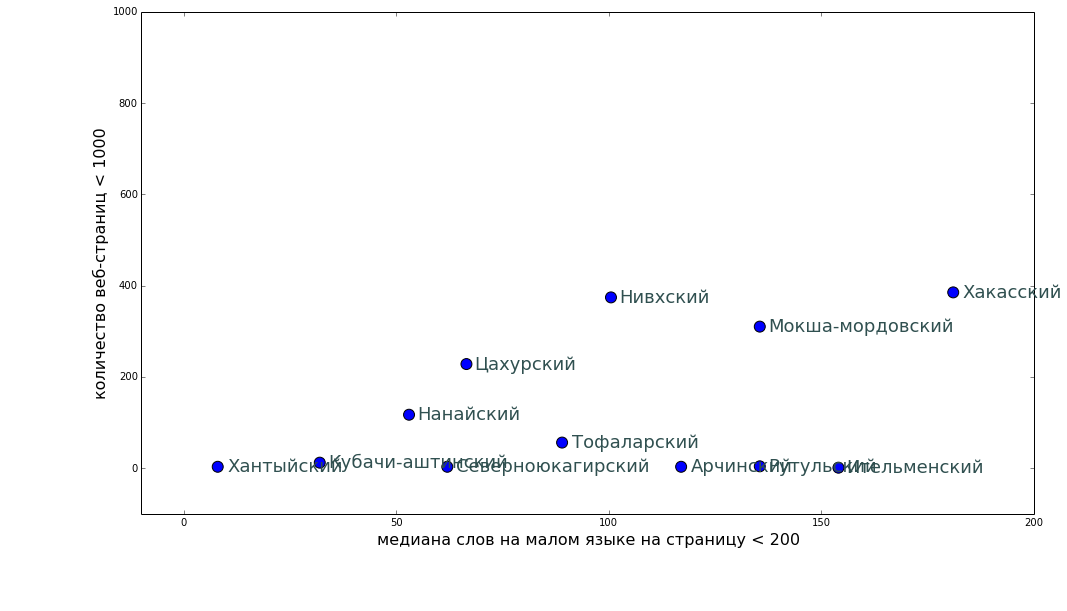

In [54]:
fig, ax = plt.subplots(figsize=(16.0, 9.0))
# numeric_data_inet.plot.scatter(x='token_median', y='urls', figsize=(12, 6))
numeric_data_inet.plot.scatter('token_median', 'urls', ax=ax, s=120) #, linewidth=0, c=range(len(numeric_data_inet)))

plt.ylabel("количество веб-страниц < 1000", fontsize=16)
plt.xlabel("медиана слов на малом языке на страницу < 200", fontsize=16)

plt.ylim([-100, 1000])
plt.xlim([-10, 200])

plt.axvline(numeric_data_inet['token_median'].mean(), color='r', linestyle='--', linewidth=3)
plt.axhline(numeric_data_inet['urls'].mean(), color='g', linestyle='--', linewidth=3)

for k, v in numeric_data_inet.ix[:, ['token_median', 'urls']].iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')

plt.savefig('token_median_200_urls_1000.png', dpi=100)